In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../datasets/dataframe_for_preprocessing.csv")
df.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,tcp,http,SF,181,5450,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,1,0,tcp,http,SF,239,486,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,2,0,tcp,http,SF,235,1337,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,3,0,tcp,http,SF,219,1337,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,4,0,tcp,http,SF,217,2032,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [4]:
df=df.drop("Unnamed: 0",axis=1)

In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [6]:
print(df.duplicated(keep=False).sum())
df.drop_duplicates(inplace=True)
print(df.shape)

367816
(145583, 41)


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,145583.0,132.027902,1.224170e+03,0.0,0.00,0.00,0.00,58329.0
src_bytes,145583.0,7995.858170,1.820402e+06,0.0,0.00,147.00,288.00,693375640.0
dst_bytes,145583.0,2859.827384,6.081042e+04,0.0,0.00,105.00,1164.50,5155468.0
land,145583.0,0.000137,1.172010e-02,0.0,0.00,0.00,0.00,1.0
wrong_fragment,145583.0,0.020202,2.393704e-01,0.0,0.00,0.00,0.00,3.0
urgent,145583.0,0.000048,1.015049e-02,0.0,0.00,0.00,0.00,3.0
hot,145583.0,0.100177,1.426813e+00,0.0,0.00,0.00,0.00,30.0
num_failed_logins,145583.0,0.000515,2.858572e-02,0.0,0.00,0.00,0.00,5.0
logged_in,145583.0,0.491493,4.999293e-01,0.0,0.00,0.00,1.00,1.0
lnum_compromised,145583.0,0.026178,3.311407e+00,0.0,0.00,0.00,0.00,884.0


In [8]:
constant_cols = [col for col in df.columns if df[col].min() == df[col].max()]
print(f"found {len(constant_cols)} constant cols to remove:")
print(constant_cols)
df.drop(columns=constant_cols,inplace=True)

found 2 constant cols to remove:
['lnum_outbound_cmds', 'is_host_login']


In [9]:
df.shape

(145583, 39)

In [10]:
df.describe(include="object").T

C:\Users\Dell\AppData\Local\Temp\ipykernel_24052\1274302342.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include="object").T


,count,unique,top,freq
protocol_type,145583,3,tcp,130912
service,145583,66,http,62053
flag,145583,11,SF,87456


In [11]:
low_cardinality = ["protocol_type"]
medium_cardinality = ['flag']
high_cardinality = ['service']

In [12]:
from sklearn.preprocessing import OneHotEncoder,RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

In [13]:
def get_numerical(df):
    numerical_cols = []
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        if df[col].nunique(dropna=True) > 2:
            numerical_cols.append(col)
    return numerical_cols

def get_binary(df):
    binary_cols = []
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        if df[col].nunique(dropna=True) == 2:
            binary_cols.append(col)
    return binary_cols

In [14]:
numerical_cols = get_numerical(df)
binary_cols = get_binary(df)

In [15]:
log_pipeline = Pipeline(
    steps=[
        ('to_float', FunctionTransformer(lambda X: X.astype(float), validate=False)),
        ('log', FunctionTransformer(np.log1p, validate=True)),
        ('scaler', RobustScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        
        ('num_log_scale', log_pipeline, numerical_cols),

        ('binary_pass','passthrough',binary_cols),
        ('low_ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),
         low_cardinality),

        ('medium_ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),
         medium_cardinality),

        ('high_binary', ce.BinaryEncoder(), high_cardinality)
    ],
    remainder='drop' 
)

In [16]:
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test = train_test_split(df, test_size=0.2,random_state=42)
print(f"orginal features : {X_train.shape[1]}")

orginal features : 39


In [19]:
X_train_final = preprocessor.fit_transform(X_train)

In [20]:
X_test_final = preprocessor.transform(X_test)

In [21]:
from sklearn.neighbors import LocalOutlierFactor

In [22]:
lof = LocalOutlierFactor(n_neighbors=25, novelty=True, contamination=0.1)
lof.fit(X_train_final)
y_pred = lof.predict(X_test_final)

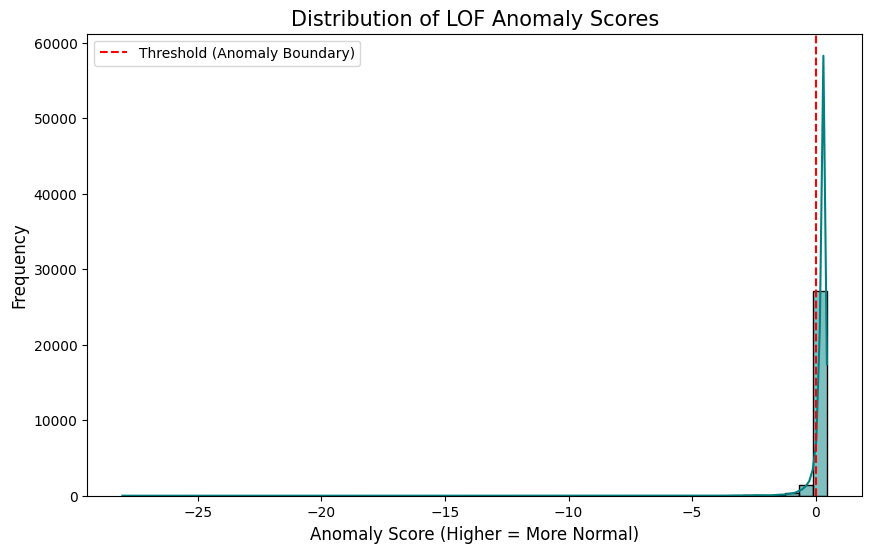

In [23]:
scores = lof.decision_function(X_test_final)
plt.figure(figsize=(10,6))
sns.histplot(scores, bins=50, kde=True, color='teal')
plt.axvline(x=0, color='red', linestyle='--', label='Threshold (Anomaly Boundary)')
plt.title('Distribution of LOF Anomaly Scores', fontsize=15)
plt.xlabel('Anomaly Score (Higher = More Normal)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

In [24]:
y_pred_lof_binary = np.where(y_pred == -1, 1,0)
print(f"Deleted {sum(y_pred_lof_binary)} anamolies in the test set.")

Deleted 3022 anamolies in the test set.


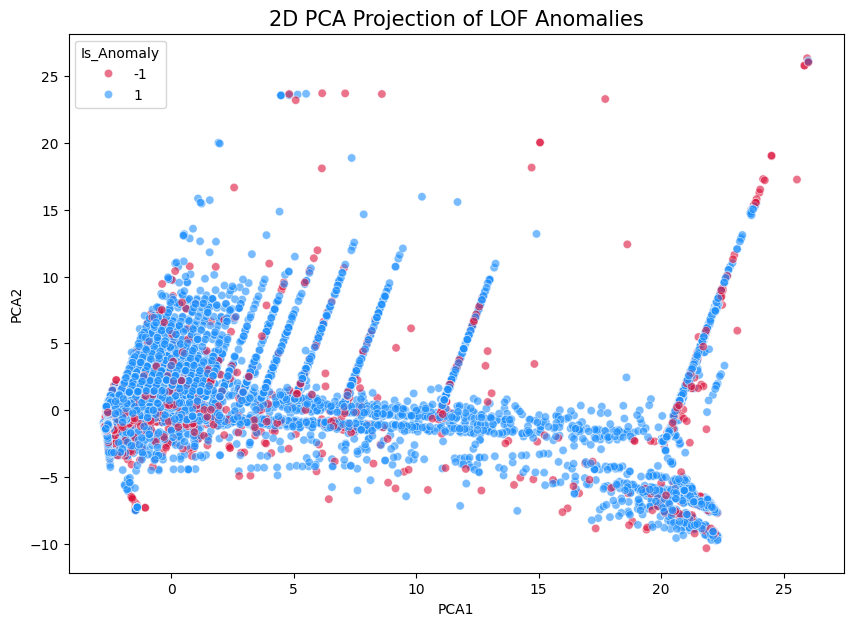

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_final)

plot_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
plot_df['Is_Anomaly'] = y_pred 

plt.figure(figsize=(10, 7))
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Is_Anomaly', 
                palette={1: 'dodgerblue', -1: 'crimson'}, alpha=0.6)
plt.title('2D PCA Projection of LOF Anomalies', fontsize=15)
plt.show()

In [26]:
from sklearn.metrics import silhouette_score

sample_size = 10000 
score = silhouette_score(X_test_final[:sample_size], y_pred[:sample_size])
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.1100


In [27]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_train_final)
y_pred_if = iso_forest.predict(X_test_final)
y_pred_if_binary = np.where(y_pred_if == -1, 1, 0)
print(f"Isolation Forest detected {sum(y_pred_if_binary)} anomalies.")

Isolation Forest detected 2843 anomalies.


In [28]:

comparison_df = pd.DataFrame({
    'LOF_Anomaly': y_pred, 
    'IF_Anomaly': y_pred_if 
})

agreement = comparison_df[(comparison_df['LOF_Anomaly'] == -1) & 
                          (comparison_df['IF_Anomaly'] == -1)].shape[0]

print(f"Number of anomalies both models agreed on: {agreement}")

Number of anomalies both models agreed on: 506


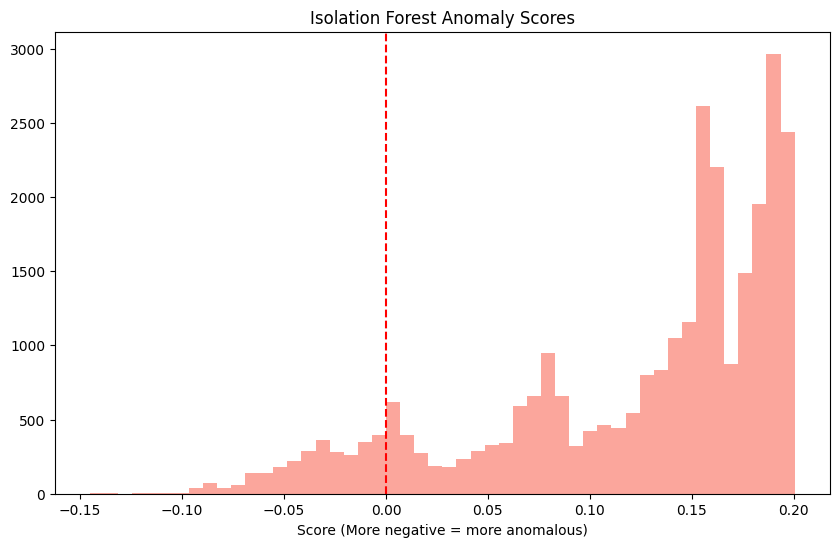

In [31]:

if_scores = iso_forest.decision_function(X_test_final)

plt.figure(figsize=(10, 6))
plt.hist(if_scores, bins=50, color='salmon', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--') 
plt.title('Isolation Forest Anomaly Scores')
plt.xlabel('Score (More negative = more anomalous)')
plt.show()

In [30]:
print(X_test_final.shape)

(29117, 55)
